# ActivateBaby - buliding tokenizer
based on [How to train a new language model from scratch using Transformers and Tokenizers](https://colab.research.google.com/github/huggingface/blog/blob/main/notebooks/01_how_to_train.ipynb#scrollTo=M1oqh0F6W3ad)


# 0. init

In [48]:
conda env list

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
# conda environments:
#
base                     /root/miniconda3
CreativeSumm             /root/miniconda3/envs/CreativeSumm
allennlp_env             /root/miniconda3/envs/allennlp_env
codenames                /root/miniconda3/envs/codenames
rsa_tapm                 /root/miniconda3/envs/rsa_tapm
sum                      /root/miniconda3/envs/sum
tapm                  *  /root/miniconda3/envs/tapm
transformers             /root/miniconda3/envs/transformers


Note: you may need to restart the kernel to use updated packages.


In [102]:
import os
from os.path import join as osj
from pathlib import Path

import nltk
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from spacy.lang.en import English
import spacy
nlp = spacy.load("en_core_web_sm")

# 1. Dataset

In [51]:
DATA_PATH = '/root/xhong/babylm/babylm_data'

In [52]:
data_version = 'babylm_10M'
data_path = osj(DATA_PATH, data_version)
data_dict = {}

for f in os.listdir(data_path):
    if f[0] == '.':
        continue
    corpus_name = f.split('.')[0]
    print(f)

open_subtitles.train
simple_wikipedia.train
wikipedia.train
switchboard.train
cbt.train
aochildes.train
bnc_spoken.train
qed.train
gutenberg.train
children_stories.train


## get corpus by sents

In [58]:
# with open(osj(data_path, "open_subtitles.train")) as infile:
#     lines = infile.readlines()
#     for idx, l in tqdm(enumerate(lines)):
#         print (idx, l)
#         if idx > 5:
#             break

In [81]:
paths = [str(x) for x in Path(data_path).glob("**/*.train")]
output_file = 'babylm_10M_sents.txt'
with open(output_file, 'w') as outfile:
    for fname in paths:
        print(fname)
        with open(fname) as infile:
            for line in tqdm(infile.readlines()):
                line = line.strip()
                if line:
                    doc = nlp(line)
                    new_line = '\n'.join([d.text for d in doc.sents])
                    if[-1] != '\n':
                        new_line += '\n'
                    outfile.write(new_line)

  0%|                                                                                               | 15/528000 [00:00<59:29, 147.91it/s]

/root/xhong/babylm/babylm_data/babylm_10M/open_subtitles.train


  0%|                                                                                                | 14/68000 [00:00<08:54, 127.29it/s]

/root/xhong/babylm/babylm_data/babylm_10M/simple_wikipedia.train


  0%|                                                                                                | 13/25000 [00:00<03:15, 127.66it/s]

/root/xhong/babylm/babylm_data/babylm_10M/wikipedia.train


  0%|                                                                                                | 19/15740 [00:00<01:25, 184.06it/s]

/root/xhong/babylm/babylm_data/babylm_10M/switchboard.train


  0%|                                                                                                | 16/26000 [00:00<02:49, 153.48it/s]

/root/xhong/babylm/babylm_data/babylm_10M/cbt.train


  0%|                                                                                                | 22/80000 [00:00<06:10, 215.79it/s]

/root/xhong/babylm/babylm_data/babylm_10M/aochildes.train


  0%|                                                                                                | 11/90000 [00:00<14:19, 104.70it/s]

/root/xhong/babylm/babylm_data/babylm_10M/bnc_spoken.train


  0%|                                                                                               | 21/100000 [00:00<08:19, 200.34it/s]

/root/xhong/babylm/babylm_data/babylm_10M/qed.train


  0%|                                                                                               | 20/120000 [00:00<10:17, 194.26it/s]

/root/xhong/babylm/babylm_data/babylm_10M/gutenberg.train


  0%|                                                                                                   | 5/6000 [00:00<02:59, 33.39it/s]

/root/xhong/babylm/babylm_data/babylm_10M/children_stories.train


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [01:08<00:00, 87.51it/s]


**example from "children_stories.train"**

In [82]:
input_str = "and got the leg of a chair and struck out into the midst of them with it. But nine devils against one soldier were still too many, and when he struck those in front of him, the others seized him behind by the hair, and tore it unmercifully. “Devils’ crew,” cried he, “it is getting too bad, but wait. Into my knapsack, all nine of you!” In an instant they were in it, and then he buckled it up and threw it into a corner. After this all was suddenly quiet, and Brother Lustig lay down again, and slept till it was bright day. Then came the inn-keeper, and the nobleman to whom the castle belonged, to see how he had fared; but when they perceived that he was merry and well they were astonished, and asked, “Have the spirits done you no harm, then?” “The reason why they have not,” answered Brother Lustig, “is because I have got the whole nine of them in my knapsack! You may once more inhabit your castle quite tranquilly, none of them will ever haunt it again.” The nobleman thanked him, made him rich presents, and begged him to remain in his service, and he would provide for him as long as he lived. “No,”"
list(nlp(input_str).sents)

[and got the leg of a chair and struck out into the midst of them with it.,
 But nine devils against one soldier were still too many, and when he struck those in front of him, the others seized him behind by the hair, and tore it unmercifully.,
 “Devils’ crew,” cried he, “it is getting too bad, but wait.,
 Into my knapsack, all nine of you!”,
 In an instant they were in it, and then he buckled it up and threw it into a corner.,
 After this all was suddenly quiet, and Brother Lustig lay down again, and slept till it was bright day.,
 Then came the inn-keeper, and the nobleman to whom the castle belonged, to see how he had fared; but when they perceived that he was merry and well they were astonished, and asked, “Have the spirits done you no harm, then?”,
 “The reason why they have not,” answered Brother Lustig, “is because I have got the whole nine of them in my knapsack!,
 You may once more inhabit your castle quite tranquilly, none of them will ever haunt it again.”,
 The nobleman tha

# 2. Train a ByteLevelBPETokenizer tokenizer

We choose to train a byte-level Byte-pair encoding tokenizer (the same as GPT-2), with the same special tokens as RoBERTa. Let’s arbitrarily pick its size to be 52,000.

We recommend training a byte-level BPE (rather than let’s say, a WordPiece tokenizer like BERT) because it will start building its vocabulary from an alphabet of single bytes, so all words will be decomposable into tokens (no more `<unk>` tokens!).


In [83]:
%%time 

from tokenizers import ByteLevelBPETokenizer

paths = [str(x) for x in Path(data_path).glob("**/*.train")]

# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=52_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])




CPU times: user 1min 52s, sys: 13.6 s, total: 2min 5s
Wall time: 8.54 s


Now let's save files to disk

In [84]:
!mkdir ByteLevelBPE
tokenizer.save_model("ByteLevelBPE")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
mkdir: cannot create directory ‘ByteLevelBPE’: File exists


['ByteLevelBPE/vocab.json', 'ByteLevelBPE/merges.txt']

🔥🔥 Wow, that was fast! ⚡️🔥

We now have both a `vocab.json`, which is a list of the most frequent tokens ranked by frequency, and a `merges.txt` list of merges.

```json
{
	"<s>": 0,
	"<pad>": 1,
	"</s>": 2,
	"<unk>": 3,
	"<mask>": 4,
	"!": 5,
	"\"": 6,
	"#": 7,
	"$": 8,
	"%": 9,
	"&": 10,
	"'": 11,
	"(": 12,
	")": 13,
	# ...
}

# merges.txt
l a
Ġ k
o n
Ġ la
t a
Ġ e
Ġ d
Ġ p
# ...
```

What is great is that our tokenizer is optimized for Esperanto. Compared to a generic tokenizer trained for English, more native words are represented by a single, unsplit token. Diacritics, i.e. accented characters used in Esperanto – `ĉ`, `ĝ`, `ĥ`, `ĵ`, `ŝ`, and `ŭ` – are encoded natively. We also represent sequences in a more efficient manner. Here on this corpus, the average length of encoded sequences is ~30% smaller as when using the pretrained GPT-2 tokenizer.

Here’s  how you can use it in `tokenizers`, including handling the RoBERTa special tokens – of course, you’ll also be able to use it directly from `transformers`.


In [85]:
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing


tokenizer = ByteLevelBPETokenizer(
    "./ByteLevelBPE/vocab.json",
    "./ByteLevelBPE/merges.txt",
)

In [86]:
tokenizer._tokenizer.post_processor = BertProcessing(
    ("</s>", tokenizer.token_to_id("</s>")),
    ("<s>", tokenizer.token_to_id("<s>")),
)
tokenizer.enable_truncation(max_length=512)

In [87]:
tokenizer.encode("Hello world").ids

[0, 2230, 1019, 2]

In [88]:
tokenizer.encode(" Hello world").ids

[0, 6168, 1019, 2]

In [89]:
tokenizer.encode("Hello world").tokens

['<s>', 'Hello', 'Ġworld', '</s>']

In [90]:
tokenizer.encode(" Hello world").tokens

['<s>', 'ĠHello', 'Ġworld', '</s>']

# 3. init LongformerTokenizer

In [91]:
from transformers import LongformerTokenizer
from tokenizers.processors import BertProcessing


tokenizer = LongformerTokenizer(
    "./ByteLevelBPE/vocab.json",
    "./ByteLevelBPE/merges.txt",
)

In [92]:
# tokenizer._tokenizer.post_processor = BertProcessing(
#     ("</s>", tokenizer.token_to_id("</s>")),
#     ("<s>", tokenizer.token_to_id("<s>")),
# )

In [93]:
tokenizer.encode("Hello world")

[0, 2230, 1019, 2]

In [94]:
tokenizer.encode(" Hello world")

[0, 6168, 1019, 2]

# 4. tokenize the corpora with LongformerTokenizer
input: 164927

output: 164798

In [95]:
input_file = 'babylm_10M_sents.txt'
output_file = 'babylm_10M_sent_tokens.txt'
with open(output_file, 'w') as outfile:
    with open(input_file, 'r') as infile:
        for line in tqdm(infile.readlines()):
            line = line.strip()
            if line:
#                 doc = nlp(line)
#                 new_line = '\n'.join([d.text for d in doc.sents])
                tokens = tokenizer.encode(line)
                token_line = ','.join([str(i) for i in tokens]) + '\n'
                outfile.write(token_line)

100%|████████████████████████████████████████████████████████████████████████████████████████| 1180421/1180421 [04:25<00:00, 4442.37it/s]


## token statistics
get number of tokens per sentence

In [97]:
from collections import defaultdict
input_file = 'babylm_10M_sents.txt'
stat_num_token = defaultdict(int)

with open(input_file, 'r') as infile:
    for line in tqdm(infile.readlines()):
        line = line.strip()
        if line:
#                 doc = nlp(line)
#                 new_line = '\n'.join([d.text for d in doc.sents])
            tokens = tokenizer.encode(line)
            stat_num_token[len(tokens)] += 1

100%|████████████████████████████████████████████████████████████████████████████████████████| 1180421/1180421 [04:09<00:00, 4740.18it/s]


### Statistics
number of tokens per sentence

In [120]:
tab = pd.DataFrame(list(stat_num_token.keys()))
tab.describe()

,0
count,290.000000
mean,188.806897
std,193.643156
min,3.000000
25%,75.250000
50%,147.500000
75%,237.500000
max,1928.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d30c08a90>]],
      dtype=object)

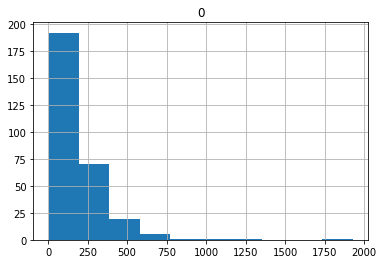

In [119]:
tab.hist()

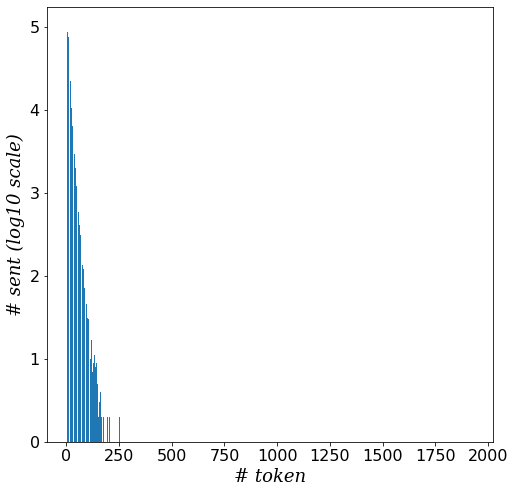

In [117]:
italic_font = {'family':'serif', 
        'style':'italic', 
        'size':18 }

X = list(stat_num_token.keys())
Y = [np.log10(y) for y in list(stat_num_token.values())]

plt.figure(figsize=(8,8))
plt.bar(X, Y)

plt.xlabel('# token', fontdict=italic_font)
plt.ylabel('# sent (log10 scale)', fontdict=italic_font)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


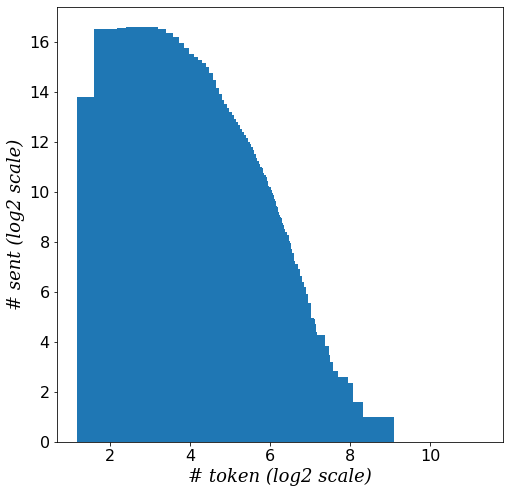

In [123]:
italic_font = {'family':'serif', 
        'style':'italic', 
        'size':18 }

X = [np.log2(x) for x in list(stat_num_token.keys())]
Y = [np.log2(y) for y in list(stat_num_token.values())]

plt.figure(figsize=(8,8))
plt.bar(X, Y)

plt.xlabel('# token (log2 scale)', fontdict=italic_font)
plt.ylabel('# sent (log2 scale)', fontdict=italic_font)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


### Questions
Do we want to remove the outliers?